### Text recognition (OCR) with Tesseract and Python

###### Install opercv and pytesseract

In [1]:
# pip install opencv-python
# pip install pytesseract

In [1]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

In [2]:
# indicate where the tesseract engine is being installed
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [3]:
# Read the image
img = cv2.imread("data/bigsleep.jpg")

In [4]:
# how the image
cv2.imshow("Img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Extract the text 
text = pytesseract.image_to_string(img)
text

"THE BIG SLEEP\nby Raymond Chandler\n\nIt was about eleven o'clock in the morning, mid October, with the sun not\nshining and a look of hard wet rain in the clearness of the foothills. I was\nwearing my powder-blue suit, with dark blue shirt, tie and display\nhandkerchief, black brogues, black wool socks with dark blue clocks on\nthem. I was neat, clean, shaved and sober, and I didn’t care who knew it. I\nwas everything the well-dressed private detective ought to be. T was\ncalling on four million dollars.\n\n‘The main hallway of the Sternwood place was two stories high. Over the\nentrance doors, which would have let in a troop of Indian elephants, there\n‘was a broad stained-glass panel showing a knight in dark armor rescuing\n"

###### Image preprocessing
Here I preprocess a quality image before giving to ocr.
Tasks that to be completed:
* Resize the Image
* Convert Image to grayscale
* Convert image to black and white

In [6]:
img2 = cv2.imread("data/book_page.jpg")

In [7]:
cv2.imshow("Image2", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
text = pytesseract.image_to_string(img2)
text

'Design before you implement\n\nparticolasly if the project involves designing a product or service, ensure\n\na bave the best possible answer in the design phase before you start\nimplementation: Another 80/20 rule says that 20 per cent of the prob-\n\nJems with any design project cause 80 per cent of the costs or overruns;\nfe\n\n4 that 80 per cent of these critical problems arise in the design phase\nni ‘ = :\n\n2 are hugely expensive to correct later, requiring massive rework and\nas :\n\nin some cases retooling.\n\ni\n\n'

###### Resize the Image
pytesseract does not work well with big image.So it is better to resize it for getting the maximum resolutions. So text will be easy to read.

In [9]:
#img2 = cv2.resize(img2, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
#img2 = cv2.resize(img2, (img2.shape[1]//2, img2.shape[0]//2), interpolation = cv2.INTER_AREA)

###### Convert Image to Grayscale
Here the text extraction is important, colors are not. In grayscale image text is easy to identify.

In [10]:
img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

###### Convert image to black and white (using adaptive threshold)
There are two types of thresholding, Such as, Simple thresholding and adative thresholding.  
* In Simple thresholding, the thresholding value is global, such as it is same for all the pixels in the image. Here pixel above threshold value would be white, pixel below that value would be black. sample of simple thresholding _, threshold = cv2.threshold(img, 155, 255, cv2.THRESH_BINARY)

* Adaptive thresholding is the method where the threshold value is calculated for the smaller regions and therefore, there will be different optimal threshold values for different regions. The addaptive threshold works only in greyscale images. 

###### adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
* src  = Source of the Image
* maxValue = A value that is to be applied if the pixel value is more than the threshold value.
* adaptiveMethod = There are two types of method. 1 ) ADAPTIVE_THRESH_MEAN_C  2) ADAPTIVE_THRESH_GAUSSAIN_C
* thresholdType = Type of the threshold to be used like (THRESH_BINARY)
* blockSize = Representing size of the pixel neighborhood used to calculate the threshold value.
* C = representing the constant used in the both methods (subtracted from the mean or weighted mean)

In [11]:
_, simple_thresholding = cv2.threshold(img2, 155, 255, cv2.THRESH_BINARY)
cv2.imshow("Simple thresholding", simple_thresholding)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
adaptive_thresh_mean_c = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 5)
cv2.imshow("Adaptive thresholding mean c ", adaptive_thresh_mean_c)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
adap_thresh_gaussain_c = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,91, 5)
cv2.imshow("Adaptive thresholding gaussain c", adap_thresh_gaussain_c)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
text = pytesseract.image_to_string(adap_thresh_gaussain_c)
text

'‘ Design before you implement\n\nsculatly if the project involves designing a product or service, ensure\nhave the best possible answer in the design phase before you start\nus nation. Another 80/20 rule says that 20 per cent of the prob-\n‘ Oh any design project cause 80 per cent of the costs or overruns;\nJems WH 80 per cent of these critical problems arise in the design phase\n; oe ueely expensive to correct later, requiring massive rework and\nand 3\n\nsn ome cases retooling.\nip\n\n'

In [15]:
text = pytesseract.image_to_string(img2)
text

'Design before you implement\n\nparticolasly if the project involves designing a product or service, ensure\n\na bave the best possible answer in the design phase before you start\nimplementation: Another 80/20 rule says that 20 per cent of the prob-\n\nJems with any design project cause 80 per cent of the costs or overruns;\nfe\n\n4 that 80 per cent of these critical problems arise in the design phase\nni ‘ = :\n\n2 are hugely expensive to correct later, requiring massive rework and\nas :\n\nin some cases retooling.\n\ni\n\n'

###### Open an Image using PIL (Pillow)

In [16]:
from PIL import Image

In [17]:
im_file = "data/page_01.jpg"
im = Image.open(im_file)
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x1522 at 0x23B34C814F0>


In [18]:
print(im.size)

(1200, 1522)


In [19]:
im.show()

In [20]:
im.rotate(180).show()

In [21]:
# Save File
im.save("temp/page_01.jpg")

###### Preprocessing image for OCR
###### Tasks
* Inverted Images
* Rescaling
* Binarization 
* Noise Removal
* Dilation and Erosion
* Rotation/Deskewing
* Removing Borders
* Transparency/Alpha Channel

In [22]:
# Open the image
image_file = "data/page_01.jpg"
img = cv2.imread(image_file)
#cv2.imshow("The Image", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [23]:
# https://stackoverflow.com/questions/28816046/
# Displaying different images in actual size in matplotlib subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width, channel = im_data.shape
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)
    
    # Create a figure of the right size with one axes that takes up the full figure
    #fig = plt.figure(figsize = figsize)
    #ax = fig.add_axes([0, 0, 1, 1])
    fig, ax = plt.subplots(figsize = figsize)
    
    # Hide spines, ticks, etc
    ax.axis("off")
    
    # Display the Image
    ax.imshow(im_data, cmap='gray')
    
    plt.show()


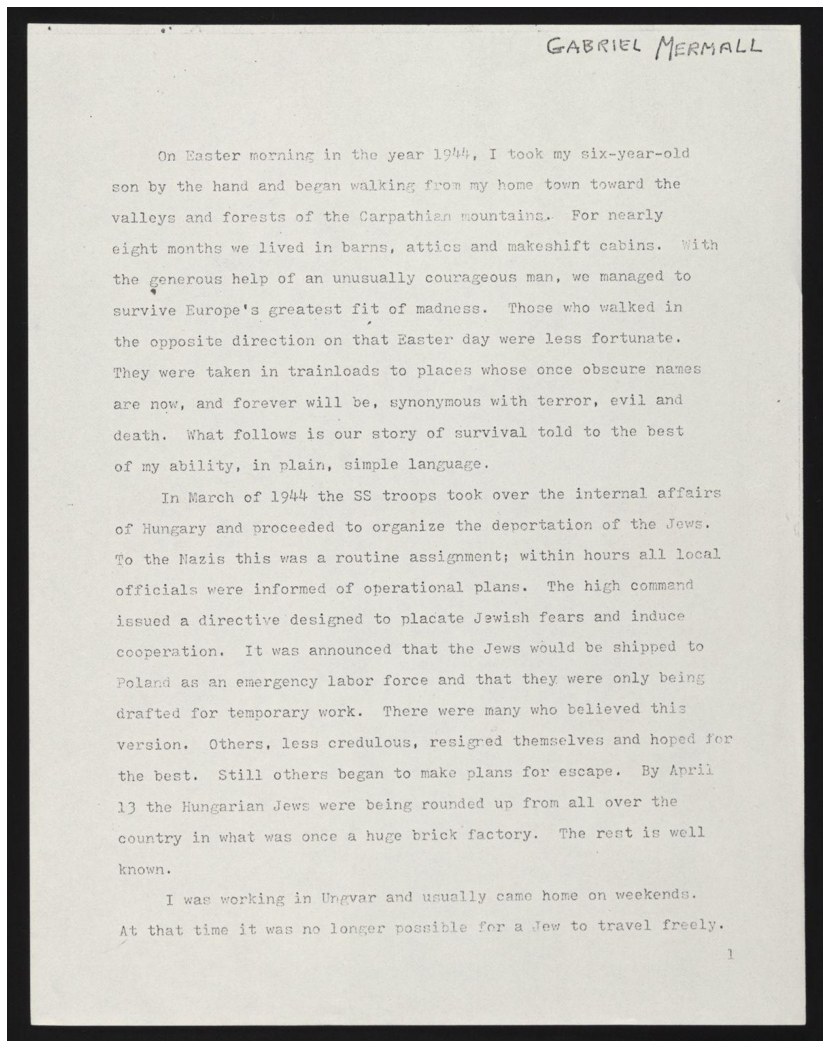

In [24]:
display(image_file)

In [25]:
def display2(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    fig, ax = plt.subplots(figsize = (15, 19))
    ax.axis("off")
    ax.imshow(im_data, cmap='gray')
    plt.show()

###### Inverted Images
It Works great with tesseract 3.0, but with tesseract 4.0 it provides poor result.

In [26]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("temp/inverted.jpg", inverted_image)

True

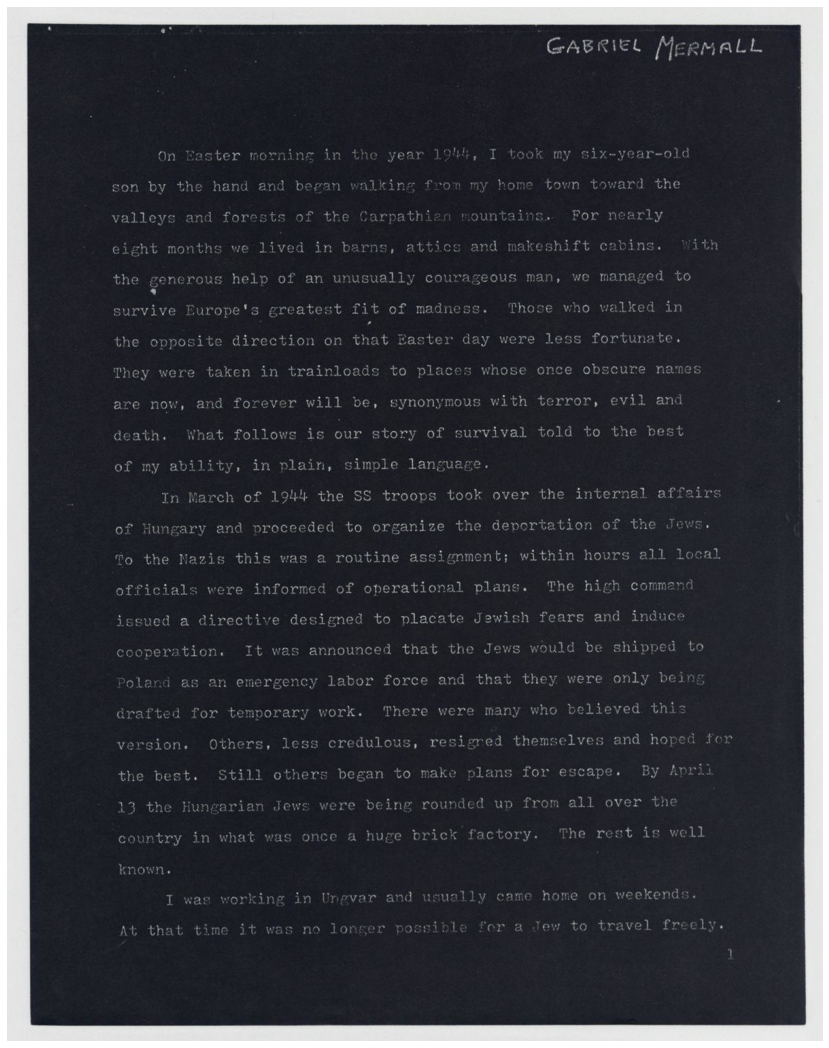

In [27]:
display("temp/inverted.jpg")

###### Binarization

In [28]:
def greyscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [29]:
gray_image = greyscale(img)
cv2.imwrite("temp/gray.jpg", gray_image)

True

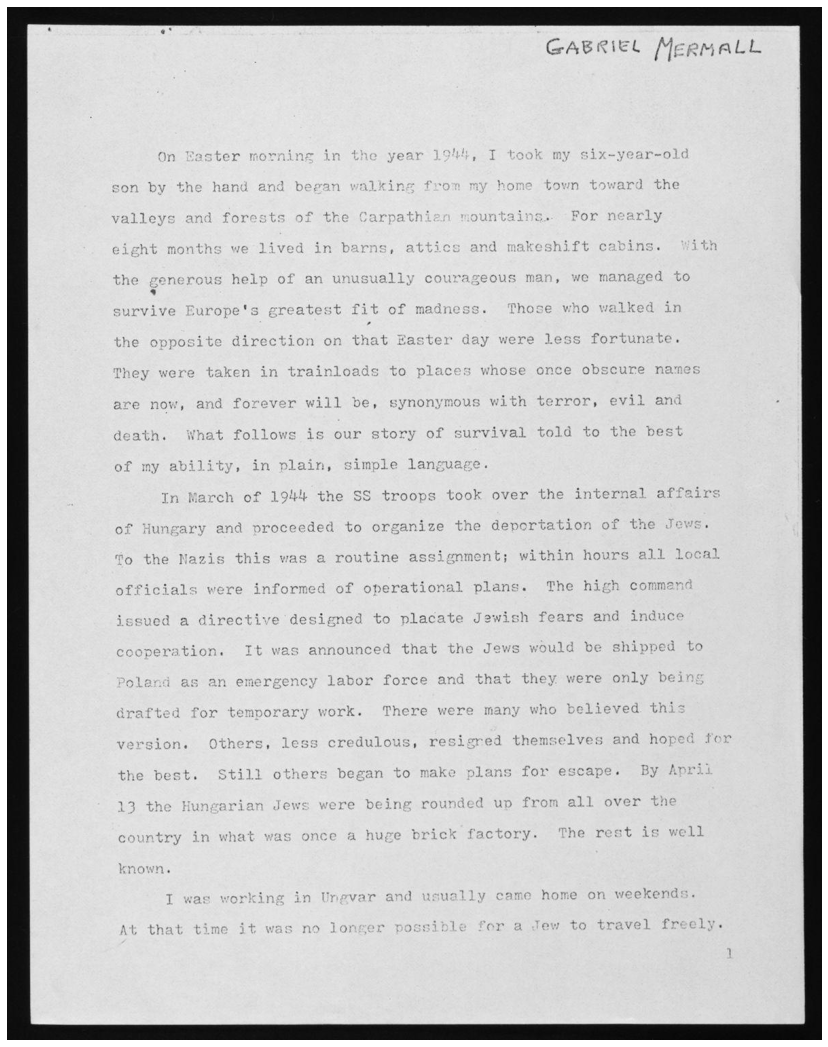

In [30]:
display2("temp/gray.jpg")

In [31]:
thresh, im_bw = cv2.threshold(gray_image, 200, 230, cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image.jpg", im_bw)

True

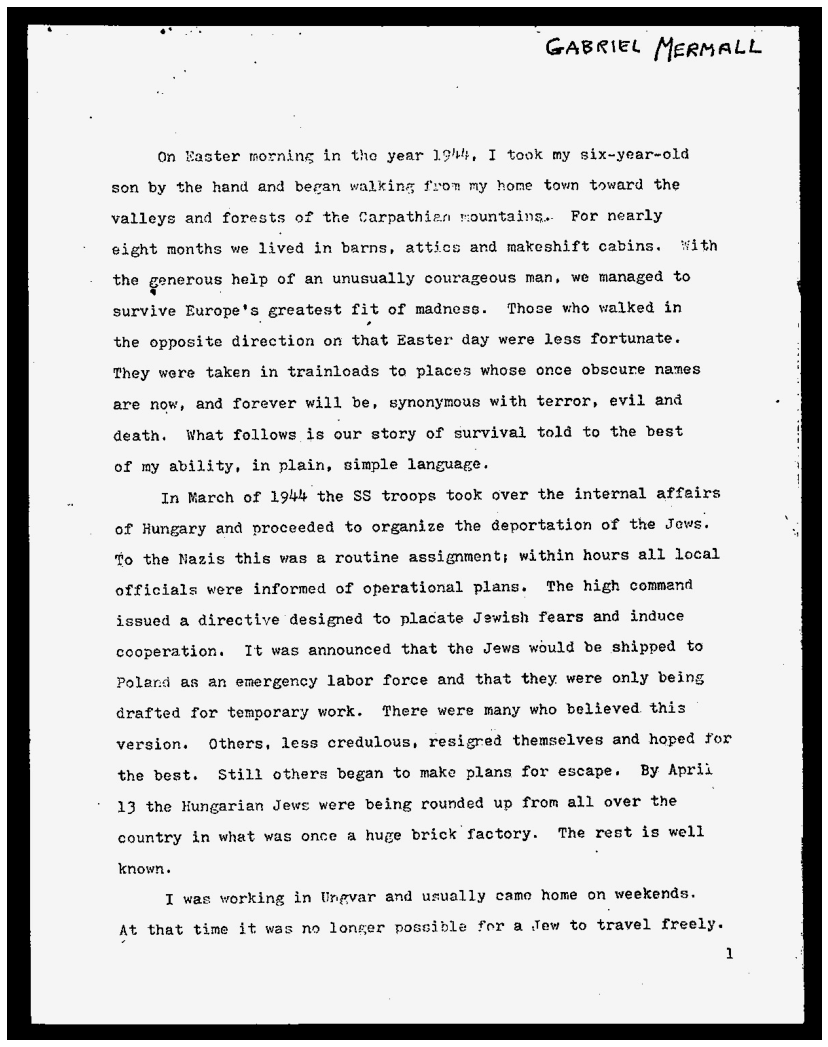

In [32]:
display2("temp/bw_image.jpg")

### Noise Removal
Noise -> Pixels that do not corrospond to text that are still surrounding certain text items.

###### OpenCV Erosion and Dilation
Erosion and Dialation are morphological image processing operations. OpenCV morphological image processing is a procedure for modifing the geometric structure of the image. In morphism We find the shape and size or structure of an object. Both operations are defined for binary images, but we can also use them on greyscale image. These are widely used in the following way:
* Removing noise
* Identify intensity bumps holes in the image
* Isolation of individual elements and joining disparate elements in image.

###### Dilation
Dilation is a technique where we expand the image. It adds the number of pixels to the boundaries of objects in an image. The struturing element controls it. 
###### Structuring Element or kernel
The structuring element is a matrix of 1's and 0's. The size and shape of the structuring element define how many numbers of the pixel should be added or removed from the objects in an image.
###### Erosion 
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). The thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises. Erosion is much similar to dilation. The difference is that the pixel value calculated minimum rather than the maximum in dilation.

In [109]:
def noise_removal(image):
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    
    # morphologyEX and medianBlur Specially used for noise removal
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 1)
    return(image)

In [110]:
no_noise = noise_removal(im_bw)
cv2.imwrite("temp/no_noise.jpg", no_noise)

True

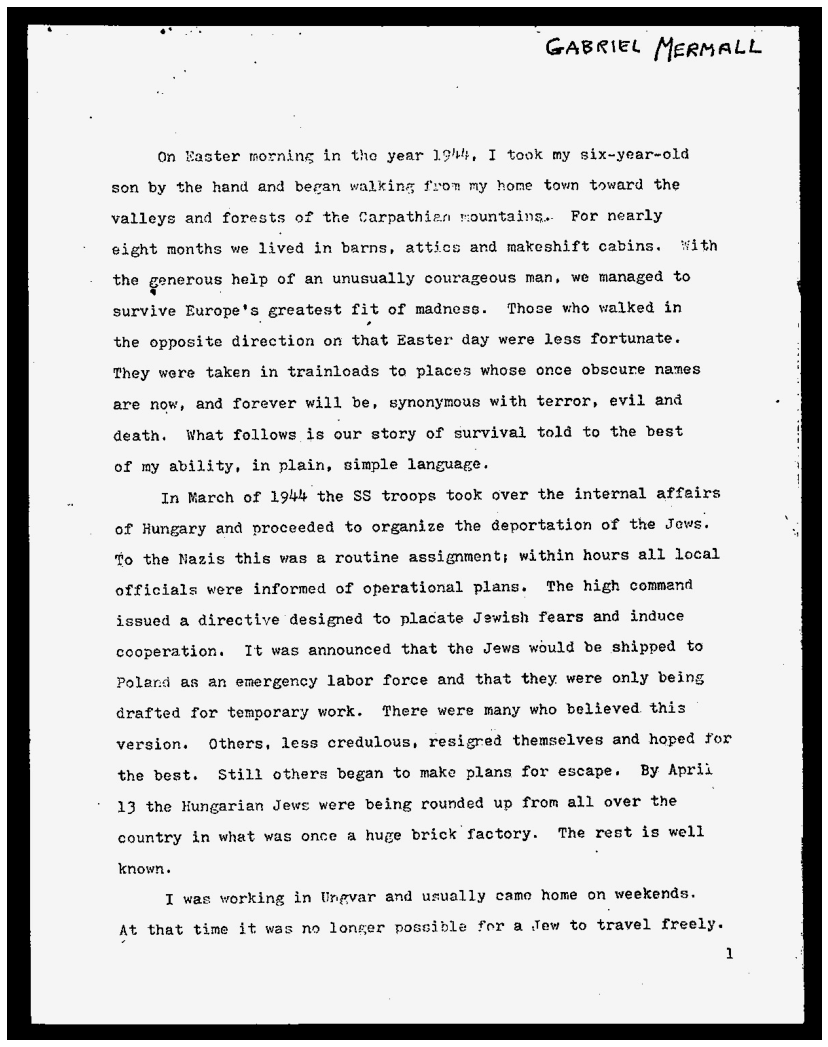

In [111]:
display2("temp/no_noise.jpg")

###### Dilation and Erosion

In [116]:
def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = cv2.bitwise_not(image)
    return (image)

In [117]:
eroded_image = thin_font(no_noise)
cv2.imwrite("temp/eroded_image.jpg", eroded_image)

True

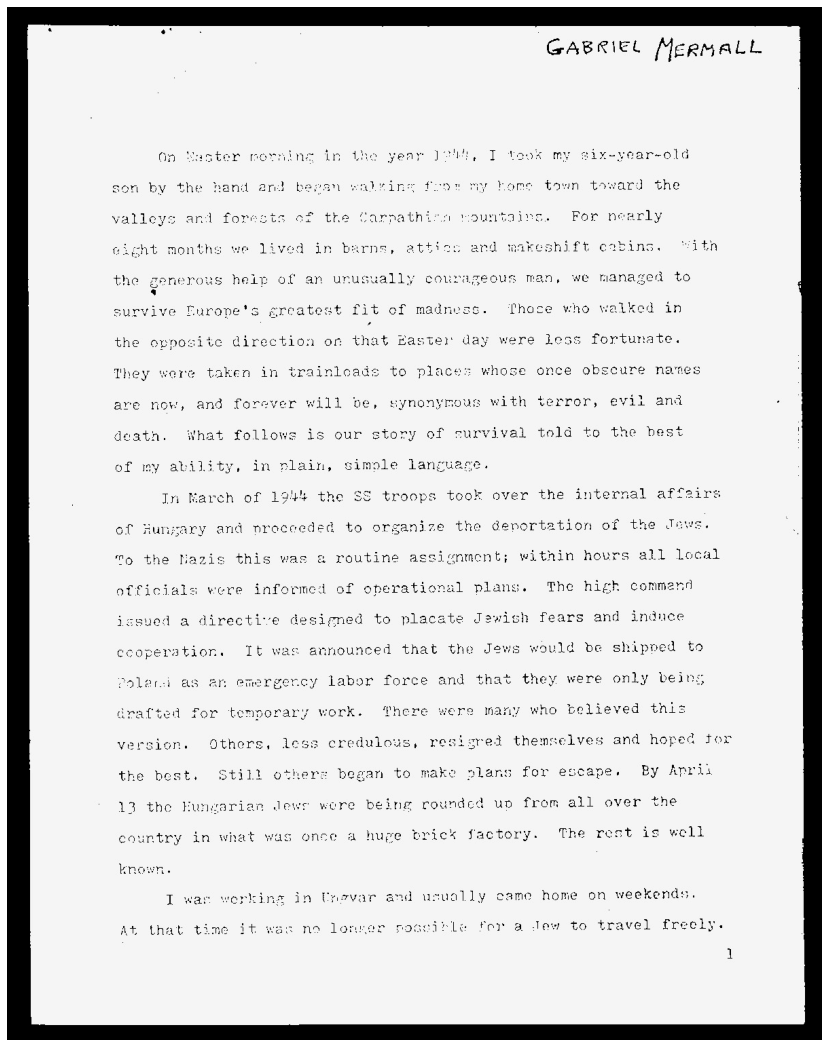

In [118]:
display2("temp/eroded_image.jpg")

In [122]:
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    image = cv2.bitwise_not(image)
    return (image)

In [123]:
dilated_image = thick_font(no_noise)
cv2.imwrite("temp/dilated_image.jpg", dilated_image)

True

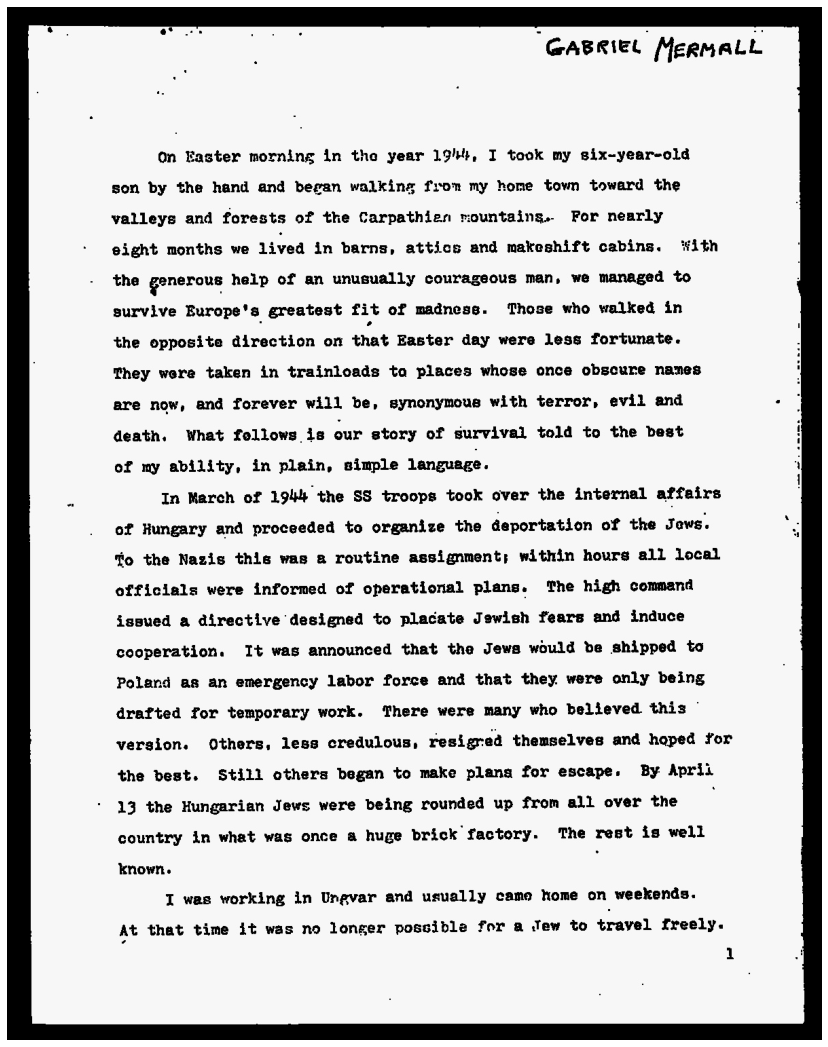

In [124]:
display2("temp/dilated_image.jpg")

###### Rotation/Deskewing

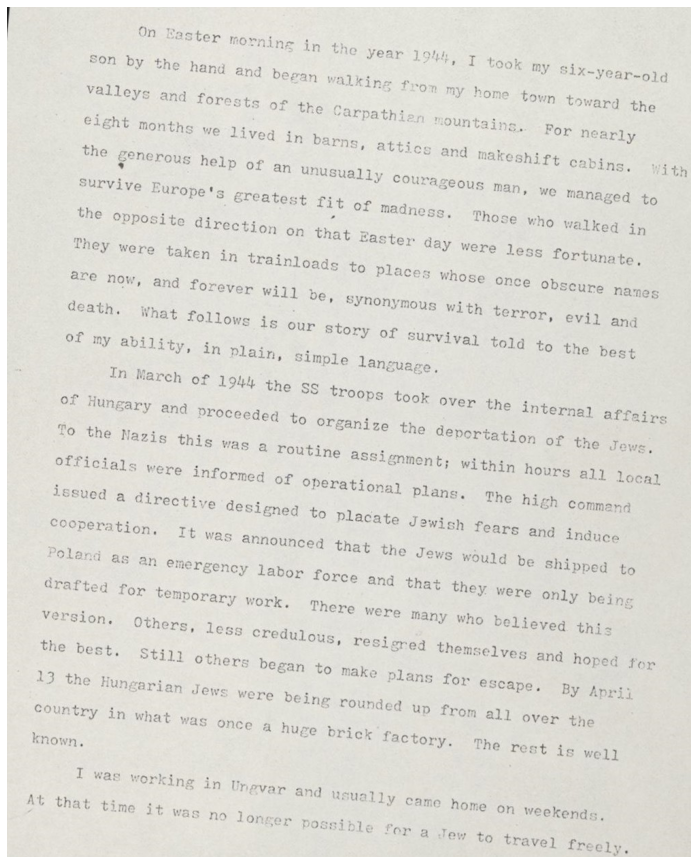

In [125]:
new = cv2.imread("data/page_01_rotated.JPG")
display("data/page_01_rotated.JPG")

In [126]:
#https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df
import numpy as np

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [127]:
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [128]:
fixed = deskew(new)
cv2.imwrite("temp/rotated_fixed.jpg", fixed)

28


True

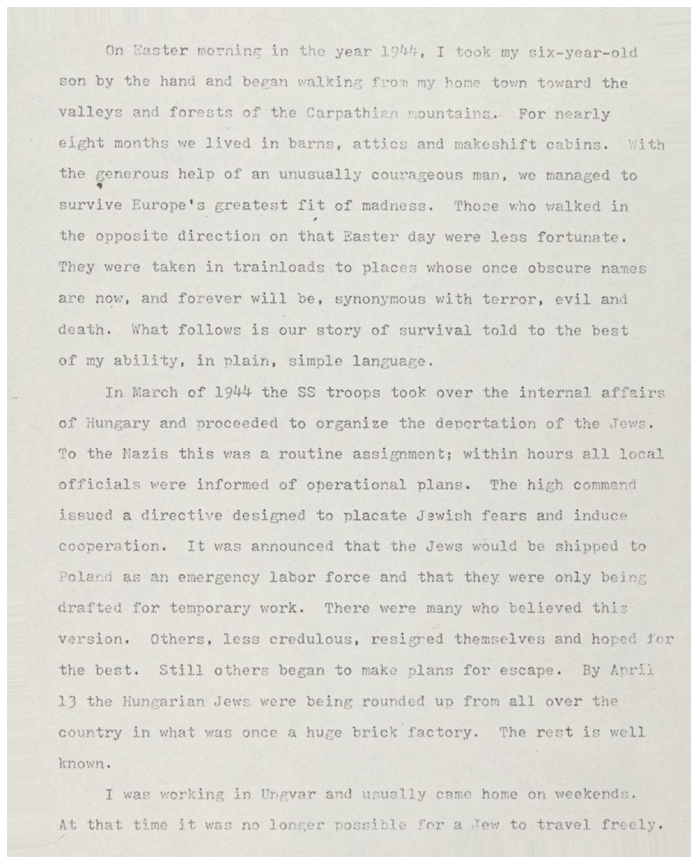

In [129]:
display("temp/rotated_fixed.jpg")

###### Removing Borders

###### Missing Borders

###### Doing OCR

In [140]:
image_file = "data/page_01.jpg"
no_noise = "temp/no_noise.jpg"

In [141]:
img = Image.open(no_noise)
#img

In [142]:
ocr_result = pytesseract.image_to_string(img)

In [143]:
print(ocr_result)

GABRIEL Meamall

On Easter morning in the year 194, I took my six-year-old
son by the hand and began walking fron my home town toward the
valleys and forests of the Carpathian rountaing.. For nearly
eight months we Tved in barns, attics and makeshift cabins. ‘With
the ONEROUS help of an unusually courageous man, we managed to
survive Europe's greatest fit of madness. Those who walked in
the opposite direction on that Easter day were less fortunate.
They were taken in trainloads to places whose once obscure names
are now, and forever will be, synonymous with terror, evil and
death, What follows is our story of survival told to the best
of my ability, in plain, simple language.

In March of 194% the SS troops took over the internal affairs
of Hungary and proceeded to organize the éeportation of the Jews.
fo the Nazis this was a routine assignment; within hours all local
officials were informed of operational plans. The high command
issued a directive designed to placate Jewish fears and 